<a href="https://colab.research.google.com/github/garmenty485/little-handmade-Tools/blob/main/EDA_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download zip file from "https://github.com/garmenty485/little-handmade-Tools/raw/main/archive.zip"
#Its original data source is from "https://www.kaggle.com/datasets/dhruvkothari19/practice-eda-on-this-sales-dataset?resource=download"

# download
!wget https://github.com/garmenty485/little-handmade-Tools/raw/main/archive.zip -O archive.zip

# extract ZIP file
import zipfile

# open ZIP and etract it into working directory
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_files")  # 解壓到 'extracted_files' 資料夾

# make sure the files in extracted_files
import os
for root, dirs, files in os.walk("extracted_files"):
    for file in files:
        print(os.path.join(root, file))


--2025-02-01 00:57:07--  https://github.com/garmenty485/little-handmade-Tools/raw/main/archive.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/garmenty485/little-handmade-Tools/main/archive.zip [following]
--2025-02-01 00:57:08--  https://raw.githubusercontent.com/garmenty485/little-handmade-Tools/main/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2504483 (2.4M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]   2.39M  --.-KB/s    in 0.05s   

2025-02-01 00:57:08 (50.8 MB/s) - ‘archive.zip’ saved [2504483/2504483]

extracted_files/Sales

In [2]:
import pandas as pd
import glob


file_paths = glob.glob("extracted_files/Sales_*.csv")


all_data = pd.DataFrame()

for file in file_paths:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df], ignore_index=True)


all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [3]:
# 檢查每個欄位的缺失值數量
missing_values = all_data.isnull().sum()

# 顯示結果
missing_values


,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [4]:
# 刪除所有欄位皆為空值的列
all_data = all_data.dropna(how='all')

# 再次檢查缺失值
missing_values_after = all_data.isnull().sum()

# 確認刪除結果
missing_values_after


,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [5]:
# 檢查每個欄位的資料型態
data_types = all_data.dtypes

# 顯示資料型態
data_types


,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


In [6]:
# 轉換數值欄位
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# 轉換日期欄位
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# 再次檢查資料型態
all_data.dtypes


<ipython-input-6-624032d47e85>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


,0
Order ID,object
Product,object
Quantity Ordered,float64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object


In [10]:
# 檢查數值與日期欄位的缺失值
missing_data = all_data[all_data.isnull().any(axis=1)]

# 顯示前 5 筆異常資料
missing_data



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,NaN,NaN,NaT,Purchase Address
3732,Order ID,Product,NaN,NaN,NaT,Purchase Address
3790,Order ID,Product,NaN,NaN,NaT,Purchase Address
4323,Order ID,Product,NaN,NaN,NaT,Purchase Address
5579,Order ID,Product,NaN,NaN,NaT,Purchase Address
...,...,...,...,...,...,...
183633,Order ID,Product,NaN,NaN,NaT,Purchase Address
184671,Order ID,Product,NaN,NaN,NaT,Purchase Address
184801,Order ID,Product,NaN,NaN,NaT,Purchase Address
185398,Order ID,Product,NaN,NaN,NaT,Purchase Address


In [11]:
# 刪除包含 NaN 或 NaT 的列
all_data = all_data.dropna(how='any')

# 再次確認是否還有缺失值
all_data.isnull().sum()


,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [12]:
# 新增「Sales」欄位
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# 顯示前 5 筆確認
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95


In [13]:
# 提取月份
all_data['Month'] = all_data['Order Date'].dt.month

# 根據月份計算總銷售額
monthly_sales = all_data.groupby('Month')['Sales'].sum()

# 顯示結果
monthly_sales


,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


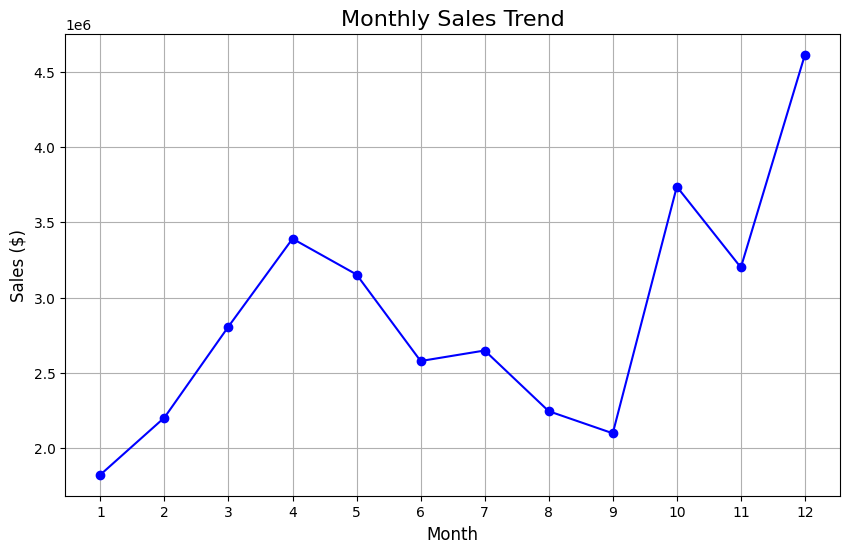

In [14]:
import matplotlib.pyplot as plt

# 繪製銷售趨勢圖
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')

# 設定標題和軸標籤
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 顯示圖表
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


In [15]:
# 根據產品計算銷售總額
product_sales = all_data.groupby('Product')['Sales'].sum()

# 顯示前 10 名銷售額最高的產品
top_10_products = product_sales.sort_values(ascending=False).head(10)

# 顯示結果
top_10_products


,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


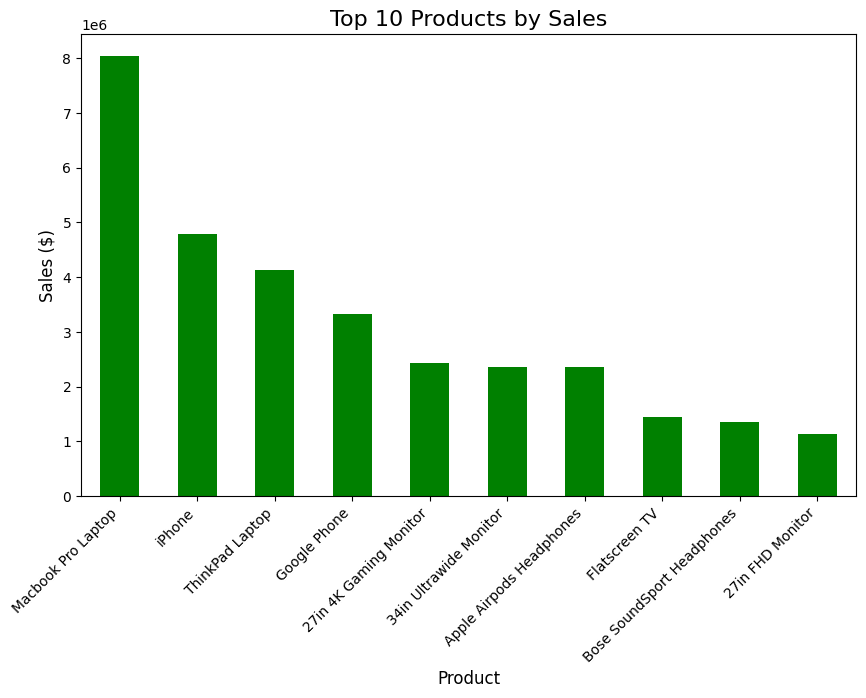

In [16]:
# 繪製條形圖
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='green')

# 設定標題和軸標籤
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 顯示圖表
plt.xticks(rotation=45, ha='right')
plt.show()


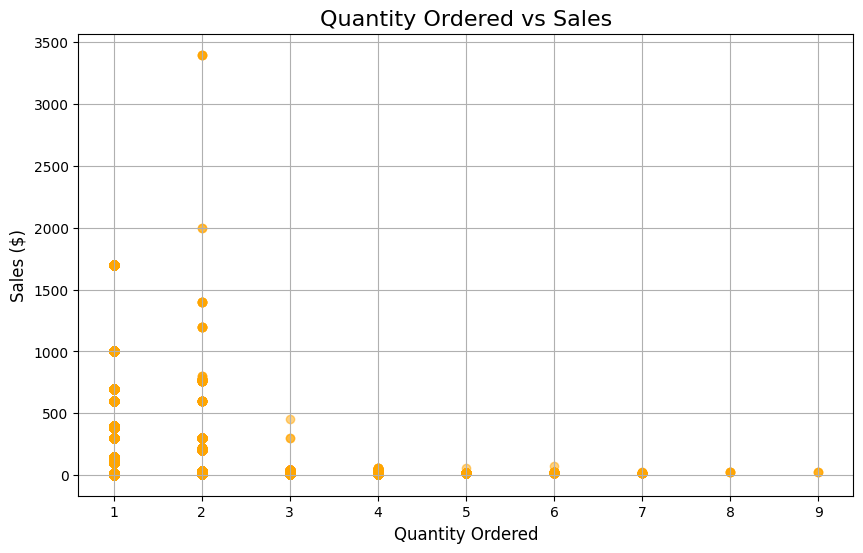

In [17]:
# 繪製訂單數量 vs 銷售額的散佈圖
plt.figure(figsize=(10, 6))
plt.scatter(all_data['Quantity Ordered'], all_data['Sales'], alpha=0.5, color='orange')

# 設定標題和軸標籤
plt.title('Quantity Ordered vs Sales', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 顯示圖表
plt.grid(True)
plt.show()


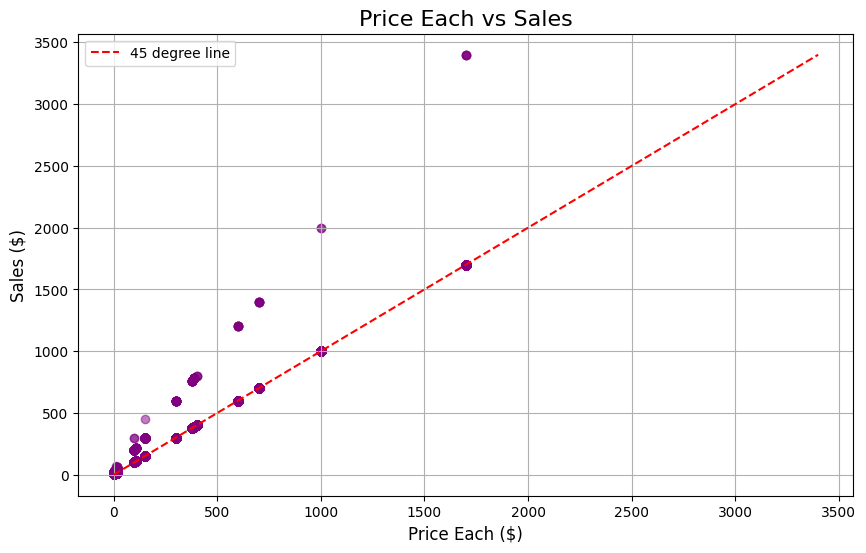

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 繪製單價 vs 銷售額的散佈圖
plt.figure(figsize=(10, 6))
plt.scatter(all_data['Price Each'], all_data['Sales'], alpha=0.5, color='purple')

# 設定標題和軸標籤
plt.title('Price Each vs Sales', fontsize=16)
plt.xlabel('Price Each ($)', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 添加45度線
max_value = max(all_data['Price Each'].max(), all_data['Sales'].max())
plt.plot([0, max_value], [0, max_value], 'r--', label='45 degree line')

# 添加圖例
plt.legend()

# 顯示圖表
plt.grid(True)
plt.show()


In [20]:
# 從地址中提取城市名稱
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# 根據城市計算銷售總額
city_sales = all_data.groupby('City')['Sales'].sum()

# 顯示銷售額前 10 的城市
top_10_cities = city_sales.sort_values(ascending=False).head(10)

# 顯示結果
top_10_cities


,Sales
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58
Dallas,2767975.40
Seattle,2747755.48
Portland,2320490.61
Austin,1819581.75


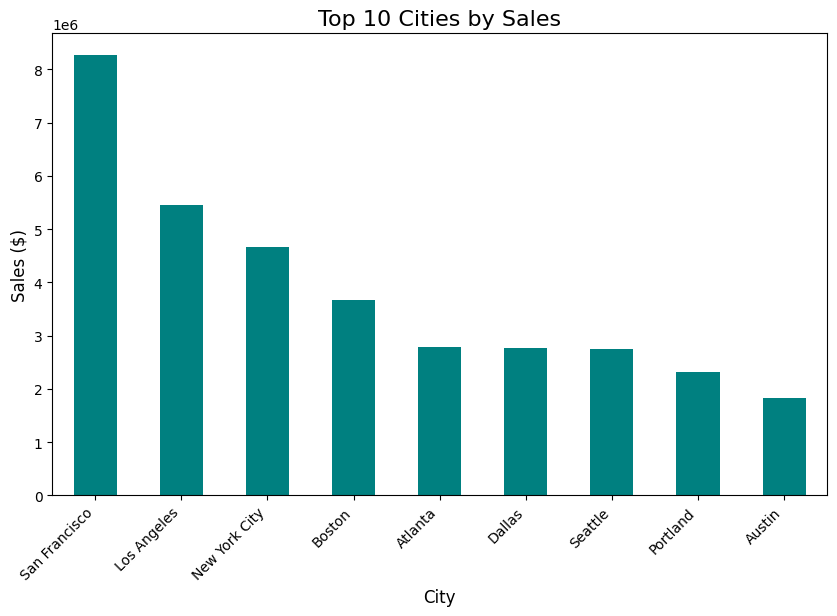

In [21]:
# 繪製城市銷售額條形圖
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='teal')

# 設定標題和軸標籤
plt.title('Top 10 Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 顯示圖表
plt.xticks(rotation=45, ha='right')
plt.show()


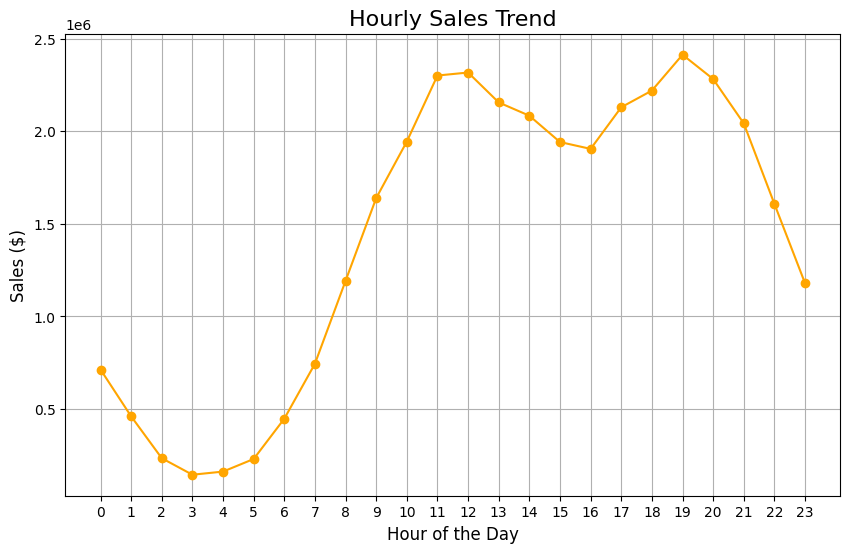

In [23]:
# 提取訂單日期中的小時部分
all_data['Order Hour'] = all_data['Order Date'].dt.hour

# 按小時計算銷售總額
hourly_sales = all_data.groupby('Order Hour')['Sales'].sum()

# 繪製每小時銷售額的折線圖
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='orange')

# 設定標題和軸標籤
plt.title('Hourly Sales Trend', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 顯示圖表
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


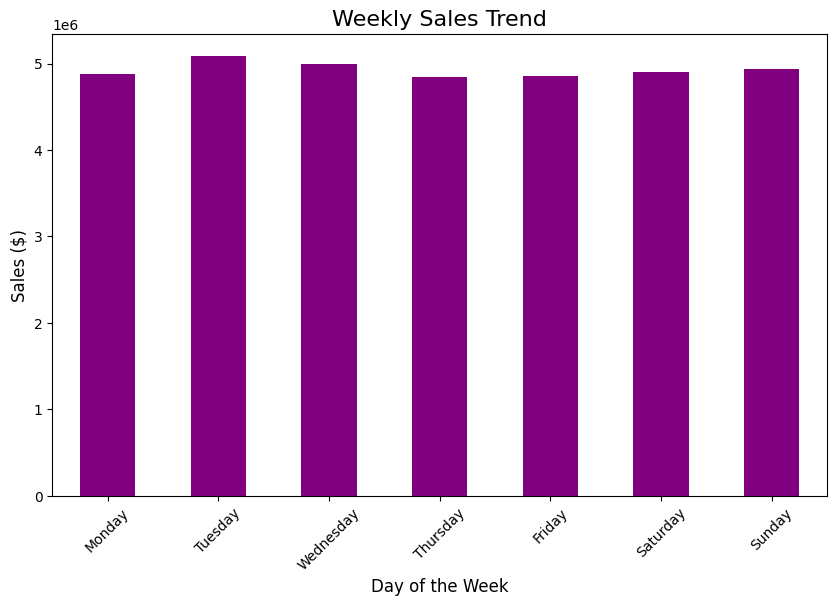

In [24]:
# 提取訂單日期中的星期幾（0=星期一，1=星期二，依此類推）
all_data['Weekday'] = all_data['Order Date'].dt.weekday

# 按星期幾計算銷售總額
weekday_sales = all_data.groupby('Weekday')['Sales'].sum()

# 設定星期的標籤
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 繪製每週銷售額的條形圖
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='purple')

# 設定標題和軸標籤
plt.title('Weekly Sales Trend', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 設定 x 軸為星期標籤
plt.xticks(range(7), weekday_labels, rotation=45)

# 顯示圖表
plt.show()


In [26]:
import scipy.stats as stats

# Group sales data by weekday
groups = [all_data[all_data['Weekday'] == i]['Sales'] for i in range(7)]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Set significance level
alpha = 0.05

# Display results
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales across different days of the week.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that sales differ significantly across days of the week.")


F-statistic: 0.8465303579110836
p-value: 0.5337002010125513
Fail to reject the null hypothesis: There is not enough evidence to conclude that sales differ significantly across days of the week.
